<a href="https://colab.research.google.com/github/danif70/Datacademy/blob/main/linear_regression_f2dd9139_7d52_4935_a857_345d13b3a50e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [2]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/studentsperformance_15085fee-8bc7-4d33-a182-655428728fe1.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.shape

(1000, 8)

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Creando un histograma

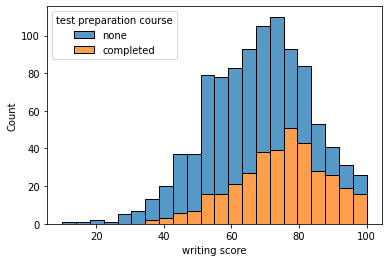

In [11]:
sns.histplot(data = df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

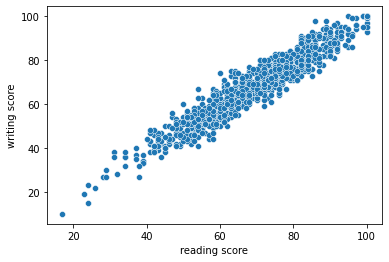

In [13]:
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

In [17]:
freq = df['writing score'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={'index': 'writing score', 'writing score': 'number of student'})
df_freq

,writing score,number of student
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [18]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [19]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [24]:
X =df['reading score'].values
Y =df['writing score'].values
X = X.reshape(-1,1)
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)


In [26]:
#Regresión Lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, Y_train)
print("La pendiente es :  ", reg.coef_)
print("El bias es:  ", reg.intercept_)



La pendiente es :   [0.98909537]
El bias es:   -0.18316638491900505


## Visualización de nuestro modelo entrenado

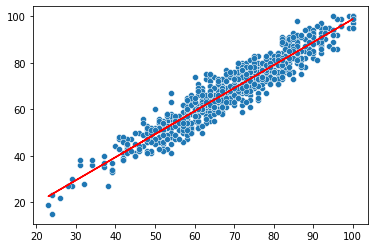

In [29]:
x_flat = X_train.flatten()
y_hat = reg.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train, y_hat, color= 'r')

## Evaluación de nuestro modelo

In [30]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

#Calcular el mean squared error
print(mean_squared_error(Y_test, y_pred))

19.05863300831597


In [31]:
value = pd.DataFrame({'Actaul test': Y_test.flatten(), 'Predict': y_pred.flatten()})
value

,Actaul test,Predict
0,93,98.726370
1,72,66.086223
2,78,82.900844
3,81,76.966272
4,74,75.977177
...,...,...
195,59,58.173460
196,56,62.129842
197,100,98.726370
198,56,56.195269
